# Part 3 - Clustering

## Import des données

In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.cluster import KMeans

from descstats import MyPCA

## Import du dataset

In [2]:
with open('data/part2.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    df = my_unpickler.load()
    
df.head(10)

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine
0,112.83,2.89,4.52,104.86,104.95,171.81,1
1,113.29,2.87,4.01,103.74,103.70,171.67,1
2,113.84,2.88,4.40,103.76,103.76,171.83,1
3,113.63,3.12,3.73,103.78,103.65,171.80,1
4,113.55,2.27,5.04,103.70,103.75,172.05,1
5,113.16,2.99,4.54,104.65,104.44,172.57,1
6,113.30,2.90,3.97,103.55,103.80,172.38,1
7,113.38,3.19,3.54,103.65,103.37,171.58,1
8,113.53,3.33,4.06,103.51,103.75,171.96,1
9,112.47,3.02,4.63,104.34,104.20,172.14,1


## Kmeans clustering

In [3]:
data = df.drop('is_genuine', axis=True).copy()
X = data.values

# All data are in the same unity (milimeters) so we don't need to scale
km = KMeans(n_clusters=2) # Two clusters (Real money VS fake money)
km.fit(X)
clusters = km.labels_

## Analyse en composantes principales

In [4]:
mypca1 = MyPCA(data, n_components=6, clusters=clusters)

## Projection sur le premier plan factoriel

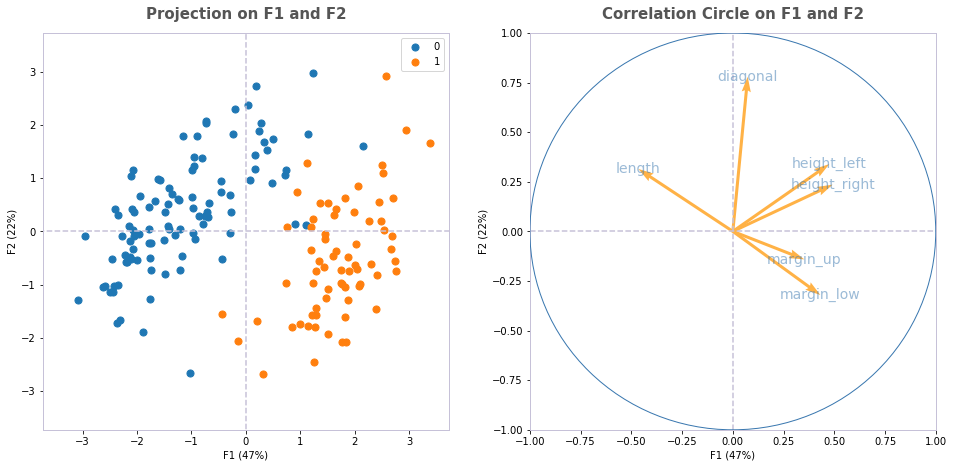

In [5]:
mypca1.scattercircle(1, 2, labelcircle=True)

## Analyse de la justesse du clustering

### Préparation des données

In [6]:
# Inverse 1 and 0
test_clusters = pd.Series(clusters).apply(lambda x: x == 0) * 1
#test_clusters = pd.Series(clusters)

# Get "is genuine" values
test_genuine = df['is_genuine'].copy()

# Create a dataframe
df_test = pd.concat([test_clusters, test_genuine], axis=1)

# Create a column to compare "is genuine" and our kmeans cluster
df_test['result'] = df_test[0] == df_test['is_genuine']

### Analyse

In [7]:
len_test = len(df_test)
len_true = len(df_test[df_test['result'] == True])
len_ratio = len_true / len_test

print(f"Success Rate: {len_true} ({len_ratio:.2%})")

Success Rate: 167 (98.24%)


## Ajout des composantes principales dans le dataset

In [8]:
df['f1'] = mypca1.X_projected[:,0]
df['f2'] = mypca1.X_projected[:,1]
df['f3'] = mypca1.X_projected[:,2]

## Sauvegarde des données

In [9]:
# Dataset
with open('data/part3.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(df)
    
# PCA
with open('data/pca.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(mypca1)